#### 【課題1】データセットの取得
pd.read_csv()を使用して、変数に格納してください。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data_ori = pd.read_csv("train.csv")

#### 【課題2】データセット自体の調査
KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください。前回扱ったirisデータセットとの比較もすると良いでしょう。

住宅価格を予測するための説明変数として、
1.住宅の場所（道路からの距離や周辺施設など）
2.住宅の情報（様式、築年数、広さなど）
3.部屋の情報（屋根、天井、キッチン、バスルームの大きさ、高さなど）
が含まれる。

#### 【課題3】データの確認
「Week3授業前課題1アヤメを分析しよう」と同様に、データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。
##### 1.各特徴量がどういったものかを見る。（数値データか文字データなど）
##### 2.今回の目的変数はどの列か確認する。

In [2]:
data_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

##### 3.特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [3]:
data_ori.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### 【課題4】欠損値への対応
欠損値に関して以下のことを行い、レポートしてください。
##### 1. 各特徴量の欠損値の有無を確認する。
欠損値の確認にはmissingnoというライブラリを活用しましょう。このライブラリにより欠損値の有無が可視化できます。インストールや使い方に関しては以下のページをご覧ください。

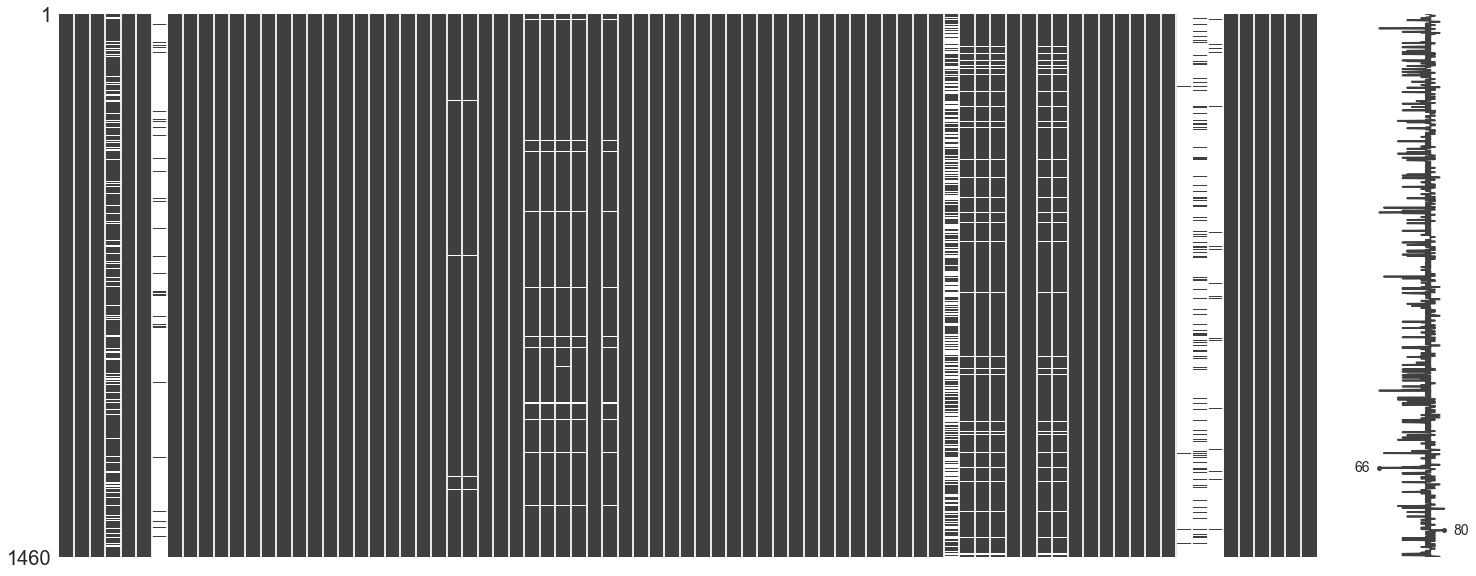

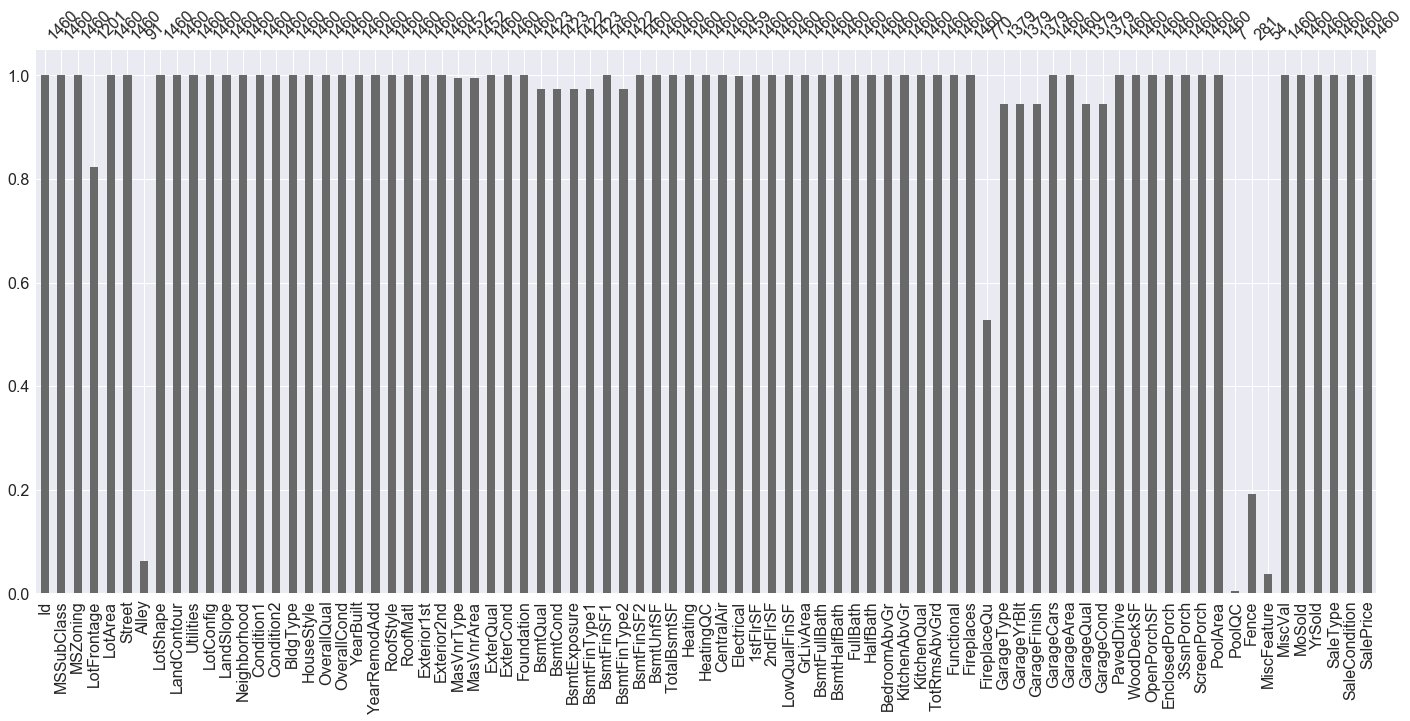

In [4]:
import missingno as msno
%matplotlib inline
msno.matrix(data_ori)
msno.bar(data_ori)

##### 2. 欠損値が何パーセント含まれるかを確認する。

In [5]:
max_num_of_row = len(data_ori)
data_loss_rate = data_ori.isnull().sum() / max_num_of_row * 100
print("データ欠損率[%]\n{}".format(data_loss_rate))

データ欠損率[%]
Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
                   ...    
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
KitchenQual       0.000000
TotRmsAbvGrd      0.000000
Functional        0.000000
Fireplaces        

##### 3. 5つ以上欠損値がある特徴量（列）は削除する。

In [6]:
data_drop_5nan_col = data_ori.dropna(axis=1, thresh=max_num_of_row-5)
print("before:{}".format(len(data_ori.columns.values)))
print("after:{}".format(len(data_drop_5nan_col.columns.values)))

before:81
after:63


##### 4. 欠損値があるサンプル（行）は削除する。

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,730.054832,56.881426,10517.363948,6.100069,5.575737,1971.244003,1984.850583,443.943797,46.581220,567.366004,...,94.240576,46.692255,21.969157,3.411926,15.071282,2.760795,43.518849,6.322824,2007.815627,180930.394791
std,421.411181,42.310746,9984.666267,1.383171,1.113079,30.199555,20.644343,456.106417,161.369977,441.992392,...,125.381679,66.267472,61.137400,29.327247,55.775138,40.191018,496.291826,2.704331,1.328542,79468.964025
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.500000,20.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000
50%,730.000000,50.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,384.000000,0.000000,479.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1094.500000,70.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,712.500000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


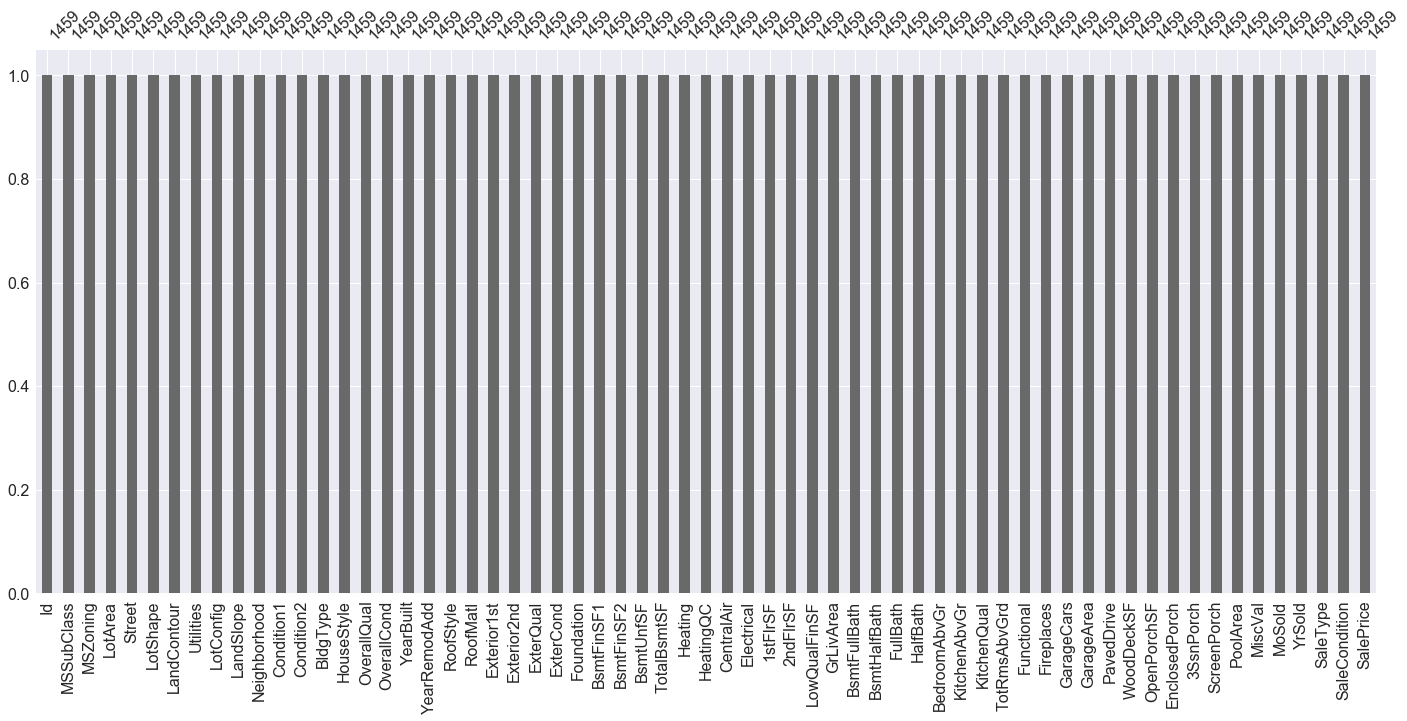

In [7]:
data_to_use = data_drop_5nan_col.dropna(axis=0)
data_to_use.reset_index(drop=True)
msno.bar(data_to_use)
data_to_use.describe()

#### 【課題5】用語の調査
以下の２つの単語を知る必要があります。これらを調査してまとめてください。
尖度
歪度

###### 尖度
分布の平均付近の尖り具合を表す指標。以下のように定義される。
$$ \mu_4 / \sigma^4   \hspace{10mm}  *\mu_4 \equiv E[(X-\mu)^4] $$
また正規分布と比較する場合以下のように定義される。
$$ \mu_4/ \sigma^4 -3 $$
正規分布より裾が長い場合は$\mu_4$が+, 裾が短い場合は-となる。

###### 歪度
分布の非対称性の度合いを表す指標。以下のように定義される。
$$ \mu_3 / \sigma^3  \hspace{10mm}   *\mu_3 \equiv E[(X-\mu)^3] $$  
平均を中心として対象ならば０、右に長い裾を持つ場合は＋、左に長い裾を持つ場合はーとなる。

#### 【課題6】分布の確認
###### 1.seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。

歪度=1.88  尖度=6.53


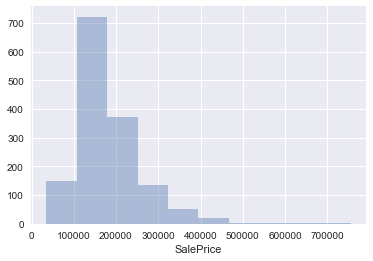

In [8]:
import seaborn as sb
target_data = data_to_use["SalePrice"]
sb.distplot(target_data, kde=False, rug=False, bins=10)
print("歪度={:.2f}  尖度={:.2f}".format(target_data.skew(), target_data.kurtosis()))

###### 2.目的変数に対して対数変換を行う。

In [9]:
target_data_log = target_data.apply(np.log)

###### 3.対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

歪度=0.12  尖度=0.81


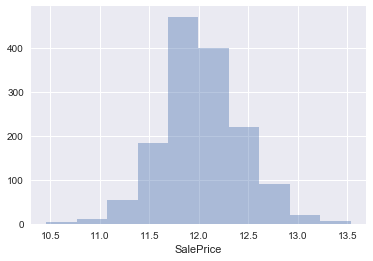

In [10]:
sb.distplot(target_data_log, kde=False, rug=False, bins=10)
print("歪度={:.2f}  尖度={:.2f}".format(target_data_log.skew(), target_data_log.kurtosis()))

###### 4.対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。

元の分布は尖度が6.53であったが、対数変換により尖度が0.81となり分布が正規分布に近くなった。またより対称な分布になった。

#### 【課題7】相関係数の確認
特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。

###### 1.相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。

相関係数行列
[[ 1.          0.01058911 -0.01150811 ... -0.01663707 -0.01731051
  -0.02175614]
 [ 0.01058911  1.          0.28714419 ...  0.01298492 -0.01490129
  -0.08423029]
 [-0.01150811  0.28714419  1.         ...  0.0588675   0.06859765
  -0.11610464]
 ...
 [-0.01663707  0.01298492  0.0588675  ...  1.          0.23208885
   0.07286484]
 [-0.01731051 -0.01490129  0.06859765 ...  0.23208885  1.
   0.14246651]
 [-0.02175614 -0.08423029 -0.11610464 ...  0.07286484  0.14246651
   1.        ]]


'\nsb.heatmap(mat_correlation, annot=True,\n                vmax=.8, \n                square=True)\n'

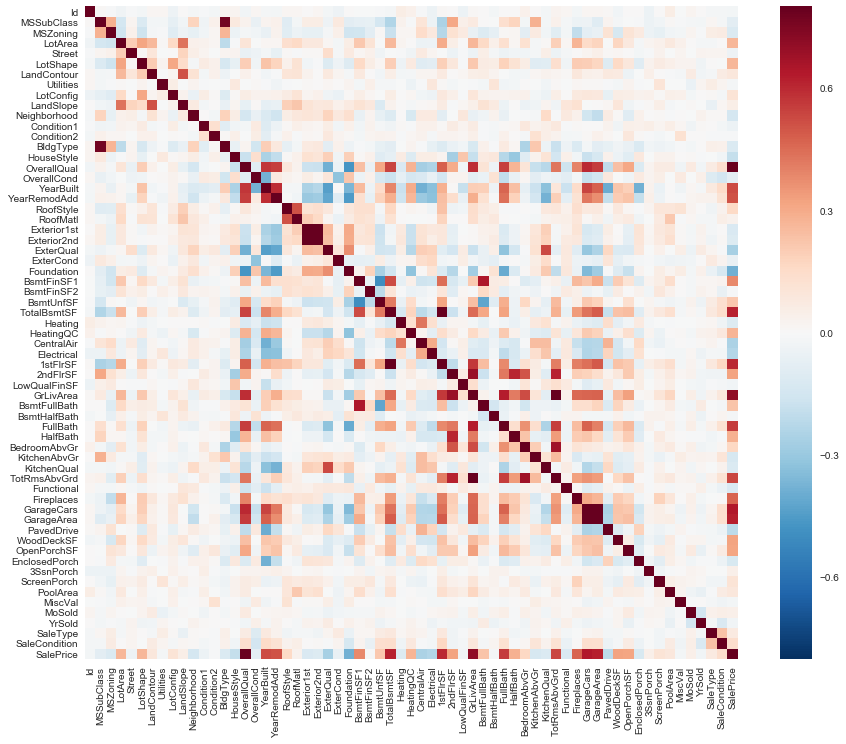

In [11]:
"""
文字列を数字に置き換え
(各特徴量毎に文字列を0~nへ置き換え。同じ文字列は同じ数字になる)
"""
col_name = data_to_use.columns.values
#list_housing_price_data = np.array([data_to_use[[col_name[i]]].values for i in range(len(col_name))])
list_object_data = data_to_use.select_dtypes(['object'])
object_col_name = list_object_data.columns.values
array_object_to_int = np.array([list_object_data[object_col_name[i]].unique() for i in range(0,len(object_col_name))])

for i in range(0,len(array_object_to_int)):
    for n in range(0,len(array_object_to_int[i])):
        data_to_use = data_to_use.replace(array_object_to_int[i][n], n)
#print(data_to_use)
"""
相関係数行列の作成＆ヒートマップの作成
"""
array_housing_price_data = np.array([data_to_use[[col_name[i]]].values for i in range(len(col_name))])
#print(array_housing_price_data.reshape(-1,len(array_housing_price_data[0])))
mat_correlation = np.corrcoef(array_housing_price_data.reshape(-1,len(array_housing_price_data[0])))
print("相関係数行列\n{}".format(mat_correlation))

plt.subplots(figsize=(15, 12))
sb.heatmap(mat_correlation, annot=False,
                xticklabels=col_name,
                yticklabels=col_name, 
                vmax=.8, 
                square=True)
"""
sb.heatmap(mat_correlation, annot=True,
                vmax=.8, 
                square=True)
"""

###### 2.目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。

選んだ特徴量
['OverallQual' 'GrLivArea' 'GarageCars' 'GarageArea' 'TotalBsmtSF'
 '1stFlrSF' 'FullBath' 'TotRmsAbvGrd' 'YearBuilt' 'YearRemodAdd']

選ん特徴量の相関係数行列
[[ 1.          0.01058911 -0.01150811 ... -0.01663707 -0.01731051
  -0.02175614]
 [ 0.01058911  1.          0.28714419 ...  0.01298492 -0.01490129
  -0.08423029]
 [-0.01150811  0.28714419  1.         ...  0.0588675   0.06859765
  -0.11610464]
 ...
 [-0.01663707  0.01298492  0.0588675  ...  1.          0.23208885
   0.07286484]
 [-0.01731051 -0.01490129  0.06859765 ...  0.23208885  1.
   0.14246651]
 [-0.02175614 -0.08423029 -0.11610464 ...  0.07286484  0.14246651
   1.        ]]


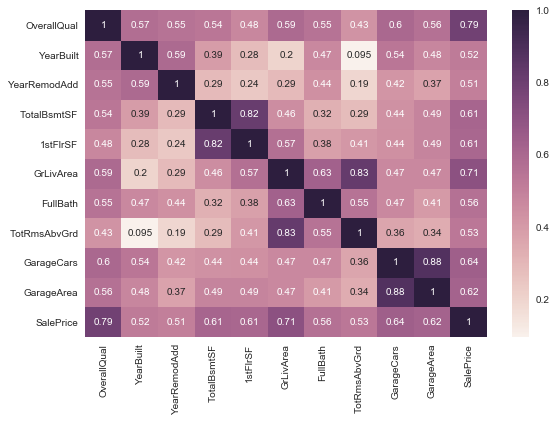

In [12]:
"""
目的変数(sales price)と各特徴量の相関係数を調べる
相関係数の高いものを10個選ぶ
"""
#目的変数sales priceとの相関係数をmat_correlation[-1]で指定
"""
top_ten = np.where((abs(mat_correlation[-1]) > 0.5) & (abs(mat_correlation[-1]) < 1) )
#print(top_ten) 
"""
mat_correlation_copy = mat_correlation[-1].copy()
mat_correlation_copy = np.abs(mat_correlation_copy)
mat_correlation_copy[mat_correlation_copy >=0.99] = 0
max_index = np.empty(0, dtype=int)
RANK = 10
for i in range(0, RANK):
    max_index = np.append(max_index, np.unravel_index(np.argmax(mat_correlation_copy), mat_correlation_copy.shape))
    value = mat_correlation_copy[int(max_index[i])]
    mat_correlation_copy[mat_correlation_copy == value] = 0      
    
top_ten = max_index

print("選んだ特徴量\n{}".format(col_name[top_ten]))
#print(type(col_name))
"""
元のデータフレームから選んだ特徴量のみを抽出＋sales priceを追加
"""
top_ten_data = data_to_use.drop(np.delete(col_name, top_ten), axis=1)
top_ten_data = pd.concat([top_ten_data, data_to_use[[col_name[-1]]]], axis=1) #Sales priceを追加
#print(top_ten_data)
"""
相関係数行列&ヒートマップを作る
"""
array_top_ten_data = np.array([top_ten_data.iloc[:,i].values for i in range(0, len(top_ten_data.columns))])
mat_correlation_top_ten = np.corrcoef(array_top_ten_data.reshape(-1,len(array_top_ten_data[0])))
print("\n選ん特徴量の相関係数行列\n{}".format(mat_correlation))
plt.subplots(figsize=(9, 6))
sb.heatmap(mat_correlation_top_ten, annot=True,
                xticklabels=top_ten_data.columns.values,
                yticklabels=top_ten_data.columns.values)

###### 3.選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。

###### OverallQual
総合的な住宅の品質（材質や完成度など）１０段階で評価される
      10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
###### YearBuilt
住宅の完成日
###### YearRemodAdd
改築日
###### TotalBsmtSF
地下室の広さ[$ft^2$]
###### 1stFlrSF
１階の広さ[$ft^2$]
###### GrLiveArea
家の面積（地上部）
###### FullBath
フルバスルーム（シンク、シャワー、バスタブ、トイレから構成される浴室）の個数　*地下を除く
###### TotRmsAbsGrd
地下室とバスルームを除いた住宅の部屋数
###### GarageCars
ガレージの車の収容台数
###### GarageArea
ガレージの広さ[$ft^2$]

###### 4.選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す

In [13]:
col_name_top_ten = top_ten_data.columns.values
mat_correlation_top_ten2 = mat_correlation_top_ten.copy()
mat_correlation_top_ten2[mat_correlation_top_ten2 >=0.99] = 0
max_index = np.empty(0, dtype=int)
max_index = []
RANK = 3
for i in range(0, RANK):
    max_index.append(np.unravel_index(np.argmax(mat_correlation_top_ten2), mat_correlation_top_ten2.shape))
    print(max_index[i])
    value = mat_correlation_top_ten2[max_index[i][0]][max_index[i][1]]
    mat_correlation_top_ten2[mat_correlation_top_ten2 == value] = 0
    print("組み合わせ{}= {} : {}".format(i+1, col_name_top_ten[max_index[i][0]], col_name_top_ten[max_index[i][1]]))

(8, 9)
組み合わせ1= GarageCars : GarageArea
(5, 7)
組み合わせ2= GrLivArea : TotRmsAbvGrd
(4, 3)
組み合わせ3= 1stFlrSF : TotalBsmtSF


#### （オプション）【課題8】重要度の算出
ランダムフォレストという機械学習手法を用いることで、重要度の値を算出できます。この値は推定を行った時に、各特徴量がどれだけ推定値に寄与しているかを表すものです。ランダムフォレストは推定によく使われる手法ですが、ここでは推定自体が目的ではなく、あくまで重要度を算出するために使います。

In [14]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

target = top_ten_data['SalePrice']
feature = top_ten_data.iloc[:,0:9]
model.fit(feature, target)
print("  特徴量   :   重要度")
for i in range(0, len(feature.columns.values)):
               print("{} : {:.3f}".format(feature.columns.values[i], model.feature_importances_[i]))

/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


  特徴量   :   重要度
OverallQual : 0.061
YearBuilt : 0.140
YearRemodAdd : 0.130
TotalBsmtSF : 0.176
1stFlrSF : 0.173
GrLivArea : 0.174
FullBath : 0.026
TotRmsAbvGrd : 0.080
GarageCars : 0.040


#### （オプション）【課題9】さらなる探索
Kaggleのカーネルを参考に、ここまでの課題にないことにも挑戦し、ノートブックにまとめてください。

                    SalePrice
MSZoning                     
C (all)  count      10.000000
         mean    74528.000000
         std     33791.092031
         min     34900.000000
         25%     43998.250000
         50%     74700.000000
         75%     98332.000000
         max    133900.000000
FV       count      65.000000
         mean   214014.061538
         std     52369.662067
         min    144152.000000
         25%    174000.000000
         50%    205950.000000
         75%    250000.000000
         max    370878.000000
RH       count      16.000000
         mean   131558.375000
         std     35714.118435
         min     76000.000000
         25%    106150.000000
         50%    136500.000000
         75%    148608.500000
         max    200000.000000
RL       count    1150.000000
         mean   191025.433913
         std     80798.501957
         min     39300.000000
         25%    137600.000000
         50%    174000.000000
         75%    224800.000000
         m

/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


                      SalePrice
CentralAir                     
N          count      95.000000
           mean   105264.073684
           std     40671.273961
           min     34900.000000
           25%     82000.000000
           50%     98000.000000
           75%    128500.000000
           max    265979.000000
Y          count    1364.000000
           mean   186200.409824
           std     78832.484149
           min     52000.000000
           25%    134725.000000
           50%    168250.000000
           75%    219282.500000
           max    755000.000000
                      SalePrice
Electrical                     
FuseA      count      94.000000
           mean   122196.893617
           std     37511.376615
           min     34900.000000
           25%     98500.000000
           50%    121250.000000
           75%    143531.250000
           max    239000.000000
FuseF      count      27.000000
           mean   107675.444444
           std     30636.507376
        

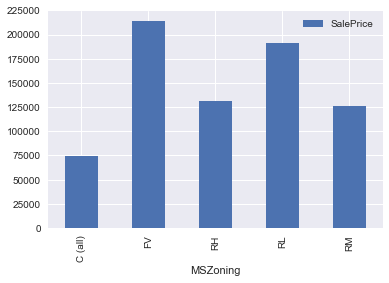

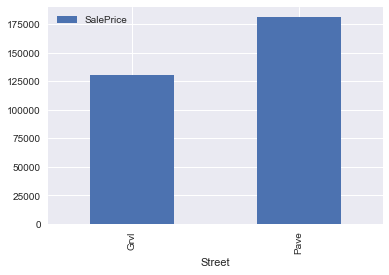

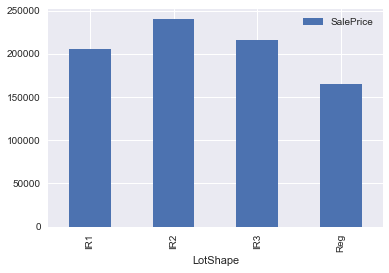

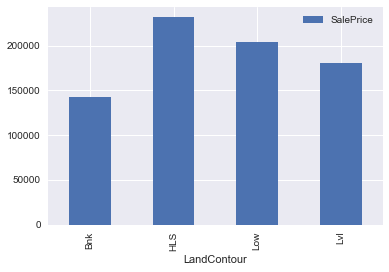

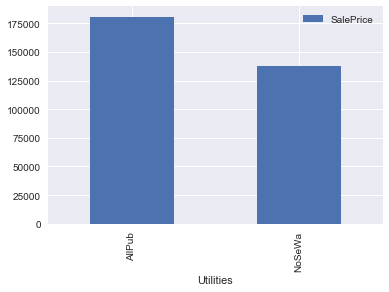

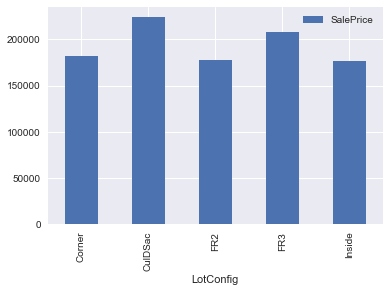

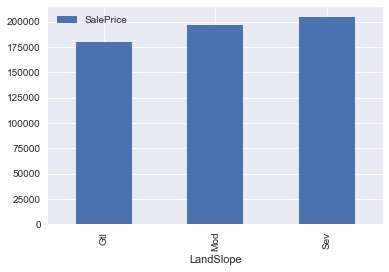

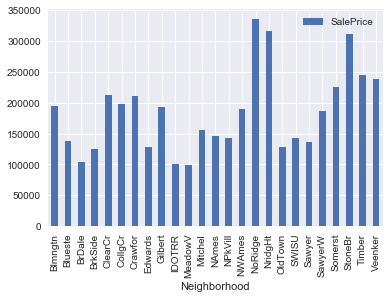

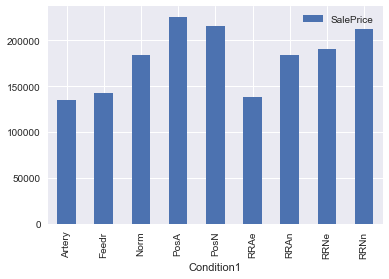

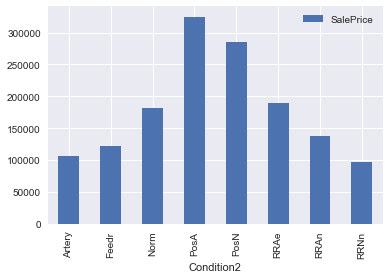

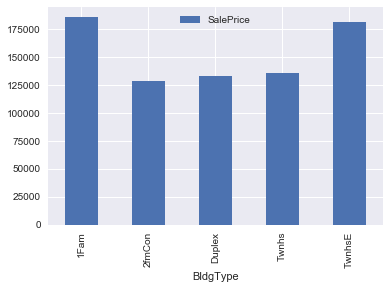

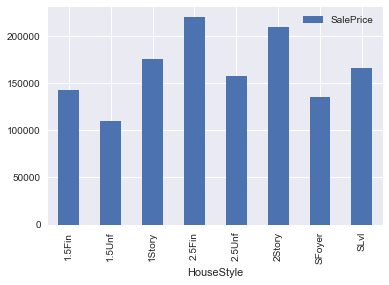

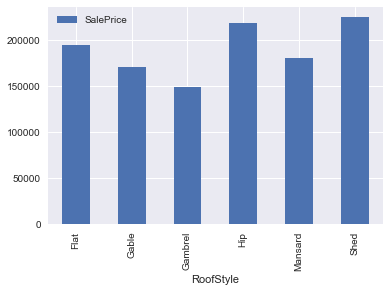

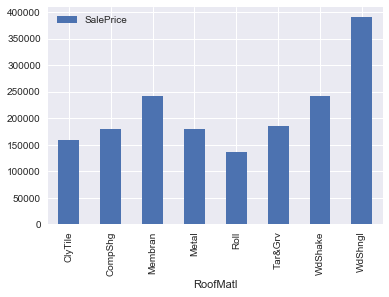

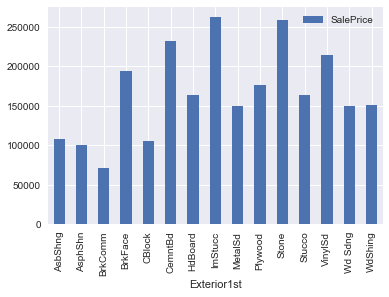

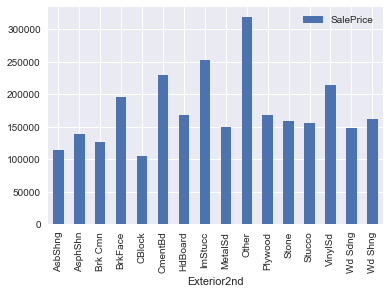

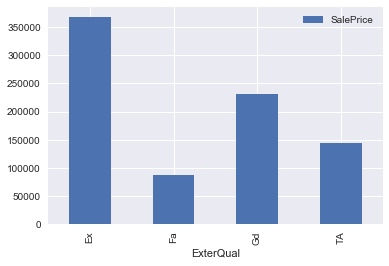

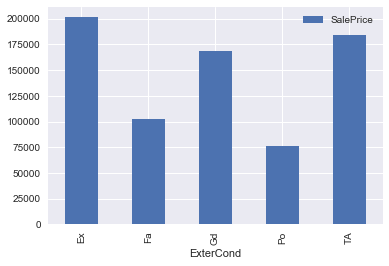

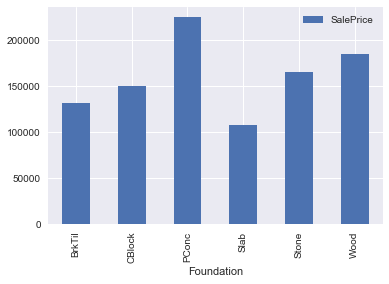

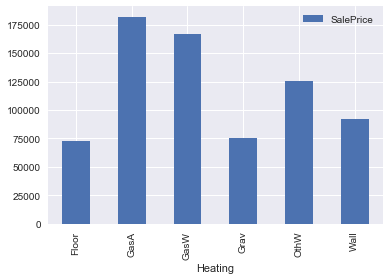

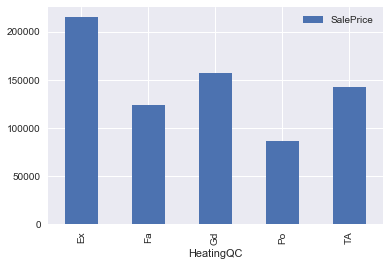

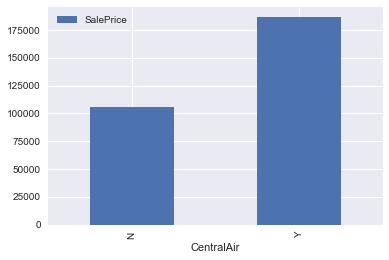

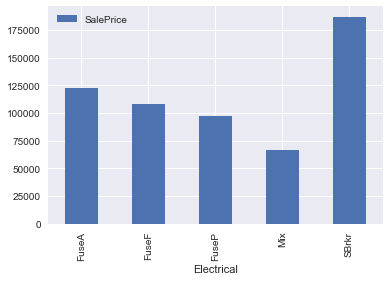

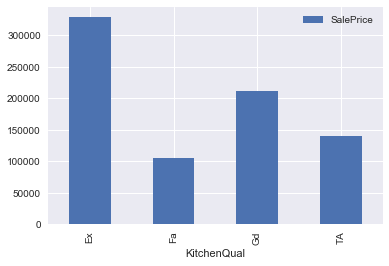

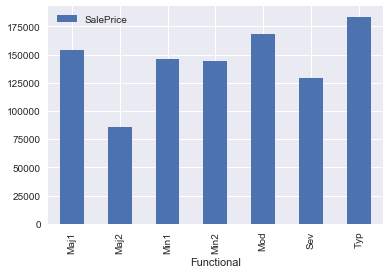

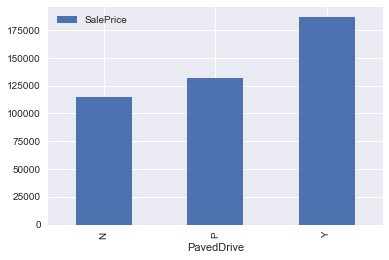

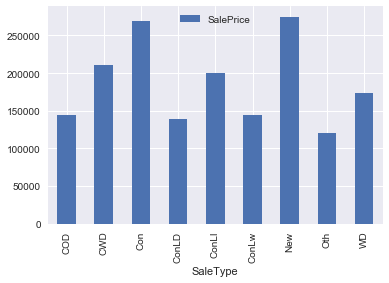

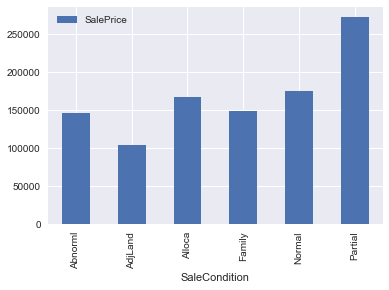

In [43]:
# Object 型データとSalePriceの関係を調べる
data_drop_5nan_col = data_ori.dropna(axis=1, thresh=max_num_of_row-5)
data = data_drop_5nan_col.dropna(axis=0)
data.reset_index(drop=True)
col_name = data.columns.values
object_data = data.select_dtypes(['object'])
object_data_col_name = object_data.columns.values
object_data = pd.concat([object_data, data[[col_name[-1]]]], axis=1) #Sales priceを追加

for i in range(0, len(object_data_col_name)):
    grouped_mean = object_data.groupby(object_data_col_name[i]).mean()
    grouped_describe = object_data.groupby(object_data_col_name[i]).describe()
    print(grouped_describe)
    grouped_mean.plot.bar()
    #sb.barplot(x=object_data_col_name[i], y="SalePrice", data=grouped)